In [4]:
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = Table.read('../../catalogs/Combined/main.vot')
df

main_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,ruwe_2,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_f,ipd_f,rv_robust_f,v_z
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,int64,int64,int64,float64
1,2797745549200763520,0.44,4.79,0.45,4.06432,19.85704,1.554,Newton17,--,,--,1.5539801,55.223293,6,65.10811689055409,1044.6532,714.6345511276562,-761.9696674473287,10.908869,2.841834,6.9795403,3.902364,1,1,1,-49.80906158947147
2,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,1.2977159,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,0,0,1,5.945556708153161
3,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,1.3819181,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,0,1,1,-13.192910481385432
4,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,1.4623499,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1,0,1,5.498893225545977
5,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,9.759859,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,1,0,1,5.019406935260629
6,2805045756653326080,0.32,1.7,0.33,12.63954,24.81658,1.538,Newton17,--,,--,1.5382388,--,40,66.7255813106135,205.82779,203.42839500687333,-31.33633841725112,11.240654,2.7810097,7.129615,1.0481054,1,1,0,0.9717194274740654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,1935209944575937024,0.18,1.28,0.19,346.28748,45.29248,8.591,Wright,--,,--,8.5905485,--,48,22.10189487036433,198.80434,185.72758564203318,70.91140500085395,12.355858,2.6908474,--,--,1,1,0,--


In [8]:
masked_bin = df['ruwe_f'] + df['ipd_f'] + df['rv_robust_f'] == 1

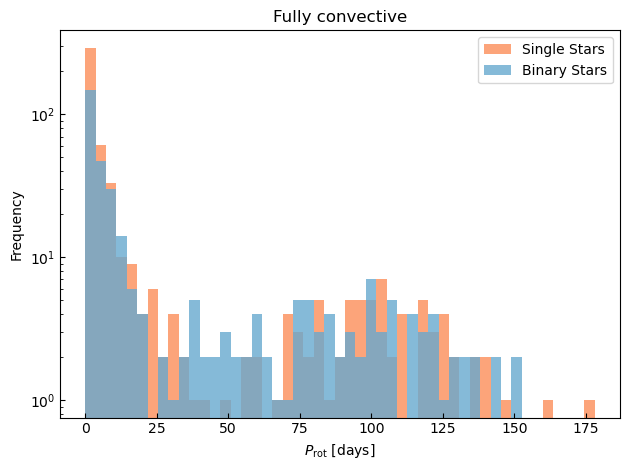

In [10]:
bins = np.linspace(0,np.max(df['Per']),50)

fully_convective = df['Mass'] < 0.35

plt.hist(df['Per'][~masked_bin * fully_convective], label = 'Single Stars', bins = bins, alpha=.8,color='#fc8d59')

plt.hist(df['Per'][masked_bin * fully_convective], label = 'Binary Stars', bins = bins, alpha=.8,color='#67a9cf')

plt.ylabel('Frequency')
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.legend()
plt.title('Fully convective')
plt.tick_params(which ='both', direction = 'in')
plt.yscale('log')
plt.tight_layout()
# plt.savefig('fully_convec_hist')

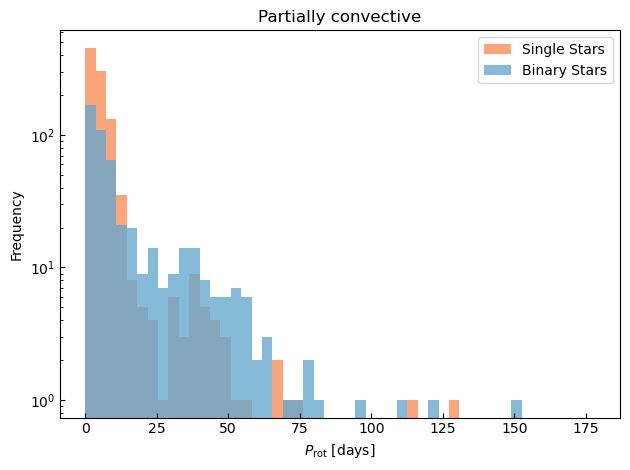

In [14]:
bins = np.linspace(0,np.max(df['Per']),50)

partially_convective = df['Mass'] > 0.35

plt.hist(df['Per'][~masked_bin * partially_convective], label = 'Single Stars', bins = bins, alpha=0.8, color='#fc8d59')
plt.hist(df['Per'][masked_bin * partially_convective], label = 'Binary Stars', bins = bins,alpha=0.8, color='#67a9cf')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel(r'$P_{\rm rot}$ [days]')
plt.tick_params(which ='both', direction = 'in')
plt.title('Partially convective')
plt.yscale('log')
plt.tight_layout()
# plt.savefig('partial_convec_hist')